<a href="https://colab.research.google.com/github/kmtsui/SummerProject2021/blob/master/Plot_TKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kmtsui/SummerProject2021

Cloning into 'SummerProject2021'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 5), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [2]:
! pip install uproot

     |████████████████████████████████| 245 kB 5.0 MB/s 


In [3]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


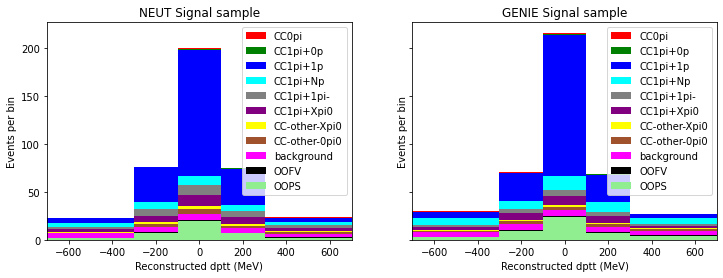

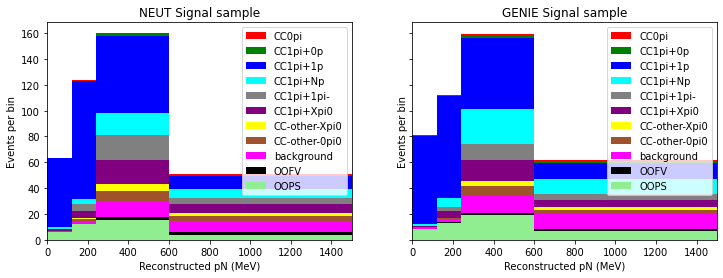

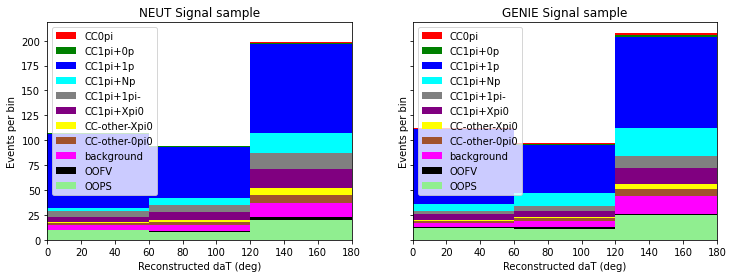

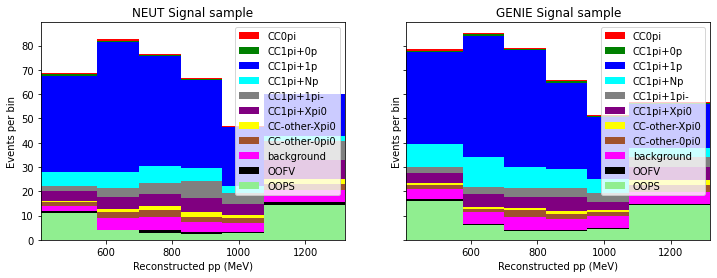

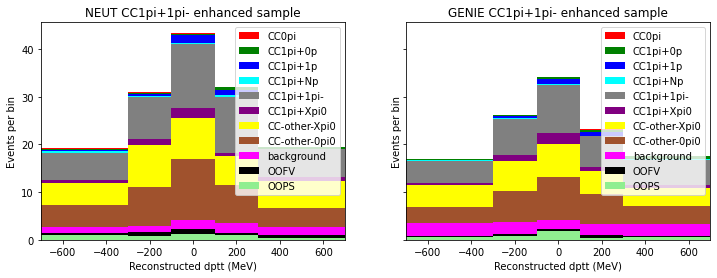

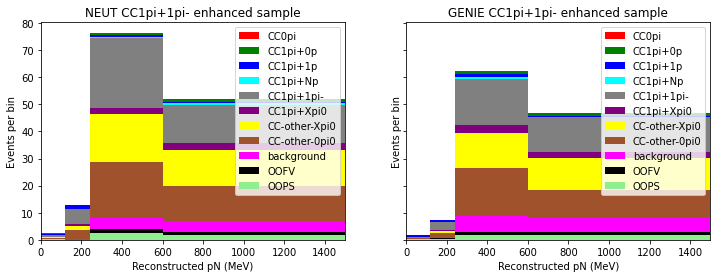

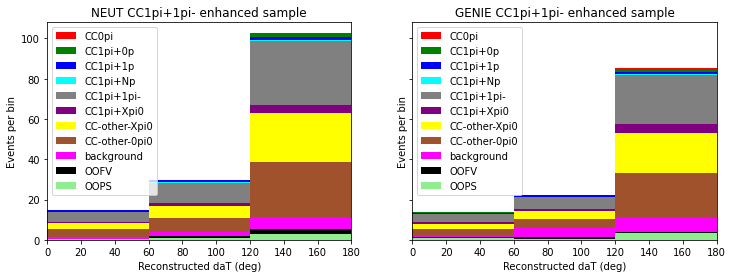

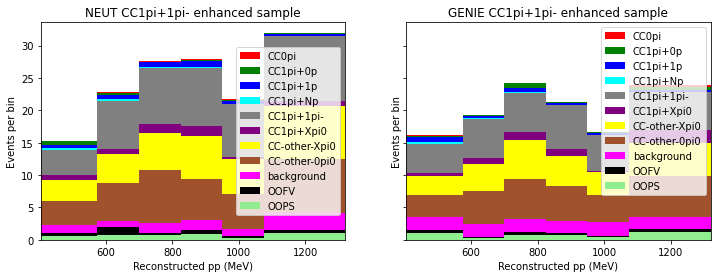

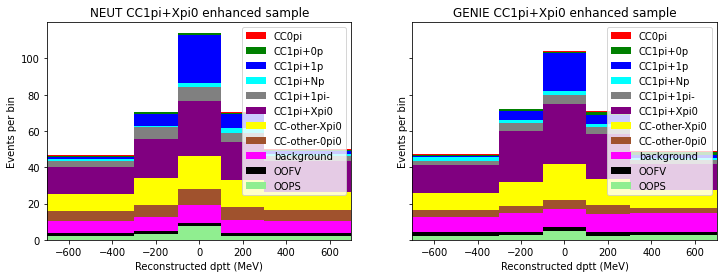

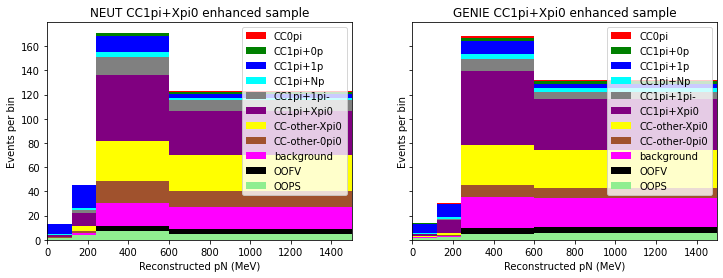

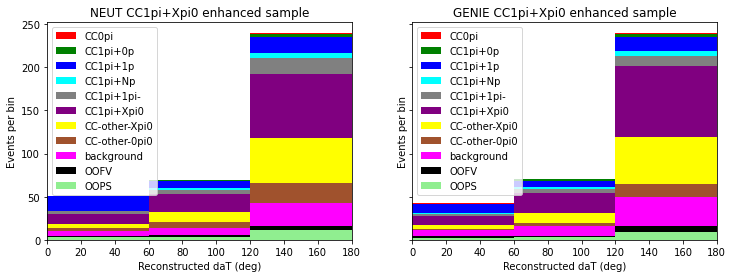

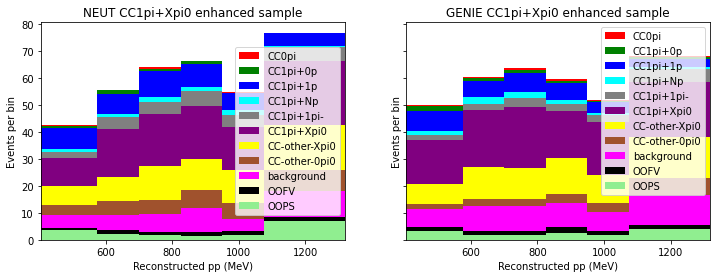

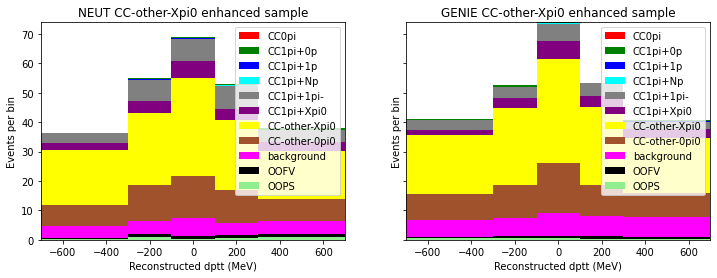

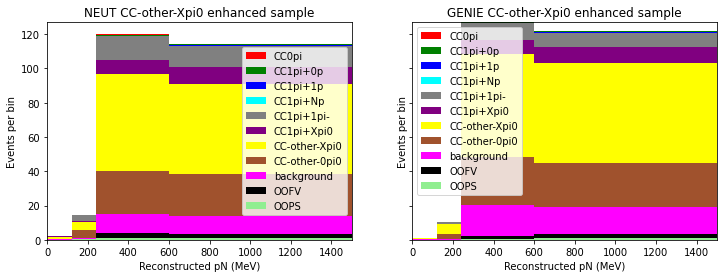

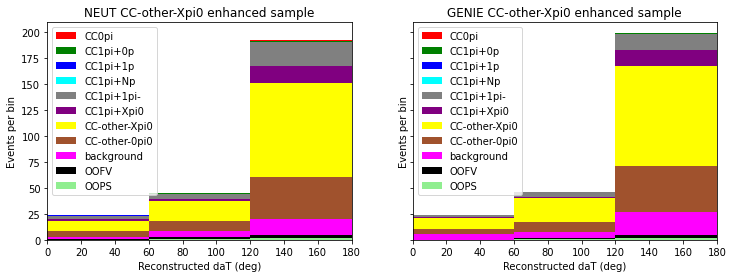

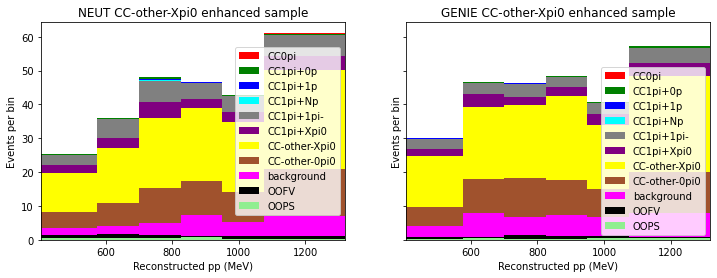

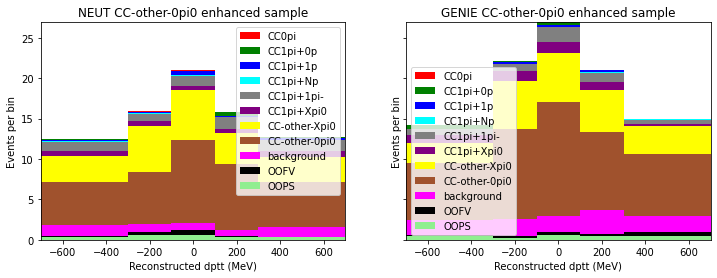

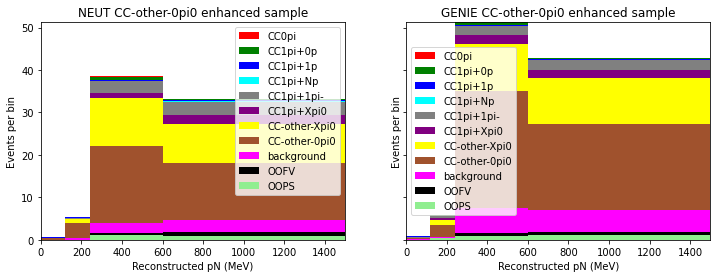

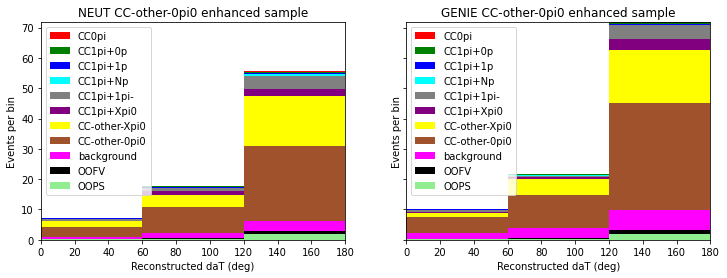

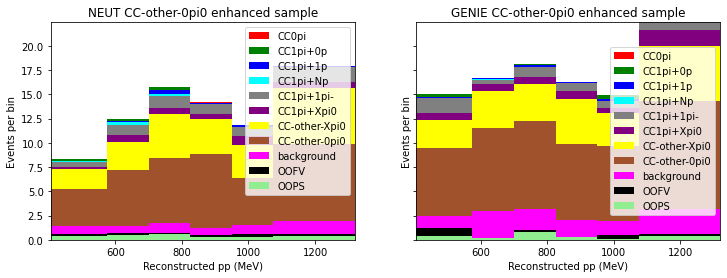

In [15]:
def getSelectedEvents(filename):
    f = uproot.open(filename)
    t = f["selectedEvents"]
    array = np.transpose(np.asarray(t.arrays(["dptt_rec","pN_rec","daT_rec","pMomRec","weight", "topology", "cutBranch","D1Rec"], library="np", how=tuple)))
    return array

neut_selected = getSelectedEvents("SummerProject2021/neut_flattree.root")
genie_selected = getSelectedEvents("SummerProject2021/genie_flattree.root")

# define binnig for the four variables
bins_dptt = [-700,-300,-100,100,300,700]
bins_pN = [0,120,240,600,1500]
bins_daT = [0,60,120,180]
bins_pp = [405,575,700,825,950,1075,1320]

# topology number, name and color
topology_idx = [0,1,2,3,5,6,7,8,9,10,11]
labels_all = ["CC0pi", "CC1pi+0p", "CC1pi+1p", "CC1pi+Np", "CC1pi+1pi-", "CC1pi+Xpi0", "CC-other-Xpi0", "CC-other-0pi0", "background", "OOFV", "OOPS"]
topology_color = ["red","green","blue","cyan","grey","purple","yellow","sienna","magenta","black","lightgreen"]
nTopology = len(topology_idx)

nVariables = 4
bins_array = [bins_dptt, bins_pN, bins_daT, bins_pp]
x_axis_labels = ["dptt (MeV)", "pN (MeV)", "daT (deg)", "pp (MeV)"]

nSamples = 5
sample_names = ["Signal sample", "CC1pi+1pi- enhanced sample", "CC1pi+Xpi0 enhanced sample", "CC-other-Xpi0 enhanced sample", "CC-other-0pi0 enhanced sample"]

for i in range(nSamples):
    neut_sample_array = neut_selected[neut_selected[:,-2]==i] # filter events for sample i
    genie_sample_array = genie_selected[genie_selected[:,-2]==i] # filter events for sample i
    if i==0: # veto OOPS events in signal sample
        neut_sample_array = neut_sample_array[neut_sample_array[:,-1]<700]
        genie_sample_array = genie_sample_array[genie_sample_array[:,-1]<700]
    neut_sample_array = neut_sample_array[:,:-2] # remove the cutBranch and D1Rec variables from array
    genie_sample_array = genie_sample_array[:,:-2] # remove the cutBranch and D1Rec variables from array
    for j in range(nVariables):
        neut_variables_array = []
        neut_weights_array = []
        genie_variables_array = []
        genie_weights_array = []
        for k in range(nTopology): 
            neut_variable_array = neut_sample_array[neut_sample_array[:,-1]==topology_idx[k]][:,j] # filter events for topology k and select only variable j
            neut_variables_array.append(neut_variable_array)
            neut_weight_array = neut_sample_array[neut_sample_array[:,-1]==topology_idx[k]][:,-2] # get the corresponding event weight
            neut_weights_array.append(neut_weight_array)
            genie_variable_array = genie_sample_array[genie_sample_array[:,-1]==topology_idx[k]][:,j] # filter events for topology k and select only variable j
            genie_variables_array.append(genie_variable_array)
            genie_weight_array = genie_sample_array[genie_sample_array[:,-1]==topology_idx[k]][:,-2] # get the corresponding event weight
            genie_weights_array.append(genie_weight_array)
        fig, ax = plt.subplots(1,2,figsize=(12, 4),sharey='row')
        ax[0].hist(neut_variables_array[::-1], bins = bins_array[j], weights = neut_weights_array[::-1], stacked = True, label=labels_all[::-1], color = topology_color[::-1]) # reverse the ordering for plotting purpose
        ax[0].legend(prop={'size': 10})
        ax[0].set_xlim(bins_array[j][0],bins_array[j][-1])
        ax[0].set_title('NEUT '+sample_names[i])
        ax[0].set_xlabel('Reconstructed '+ x_axis_labels[j])
        ax[0].set_ylabel('Events per bin')
        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles[::-1], labels[::-1]) # reverse the legend ordering too
        ax[1].hist(genie_variables_array[::-1], bins = bins_array[j], weights = genie_weights_array[::-1], stacked = True, label=labels_all[::-1], color = topology_color[::-1]) # reverse the ordering for plotting purpose
        ax[1].legend(prop={'size': 10})
        ax[1].set_xlim(bins_array[j][0],bins_array[j][-1])
        ax[1].set_title('GENIE '+sample_names[i])
        ax[1].set_xlabel('Reconstructed '+ x_axis_labels[j])
        ax[1].set_ylabel('Events per bin')
        handles, labels = ax[1].get_legend_handles_labels()
        ax[1].legend(handles[::-1], labels[::-1]) # reverse the legend ordering too